In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

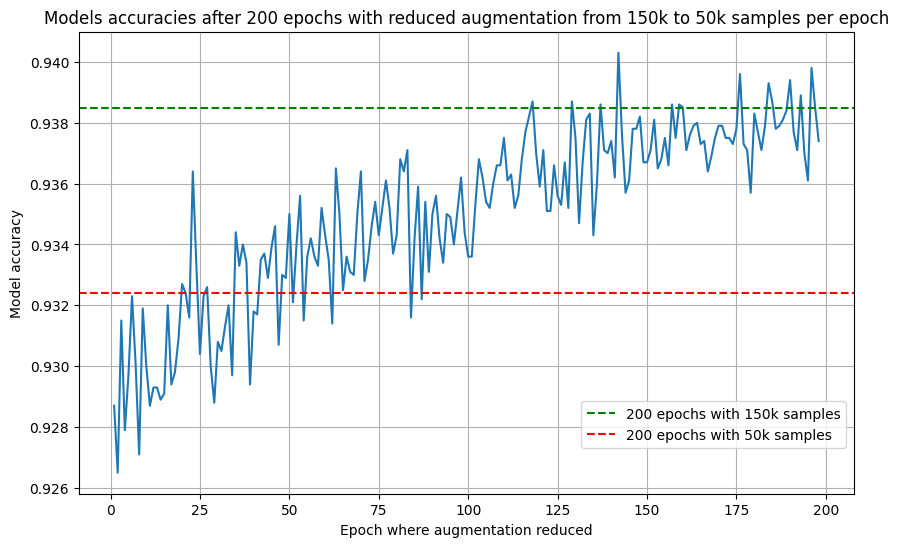

In [13]:
# Experimental variables
n = 200
original_train_size = 50000
k_hi = 3
k_lo = 1
model = 'ResNet32'
dataset = 'CIFAR10'

# Load data from CSV
input_data = pd.read_csv('./no_aug_log.csv')

# Keep only the samples of the chosen experiment
input_data = input_data[input_data['model'].str.contains(model)]

# Extract epochs and accuracies
epochs, accuracies = input_data['initial_epoch'].tolist(), input_data['accuracy'].tolist()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs[1:-1], accuracies[1:-1])
plt.axhline(y=accuracies[-1], color='g', linestyle='--', label=f'{n} epochs with {k_hi*original_train_size//1000}k samples')
plt.axhline(y=accuracies[0], color='r', linestyle='--', label=f'{n} epochs with {k_lo*original_train_size//1000}k samples')

# Move the legend to the top right corner outside the plot
plt.legend(loc='lower right', bbox_to_anchor=(0.99, 0.1), borderaxespad=0.)

# Title and labels
plt.title(f'Models accuracies after {n} epochs with reduced augmentation from {k_hi*original_train_size//1000}k to {k_lo*original_train_size//1000}k samples per epoch')
plt.xlabel('Epoch where augmentation reduced')
plt.ylabel('Model accuracy')

# Enable grid
plt.grid(True)

# Save the plot
#plt.savefig(f'./figures/{model}_{dataset}_no_aug_results.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

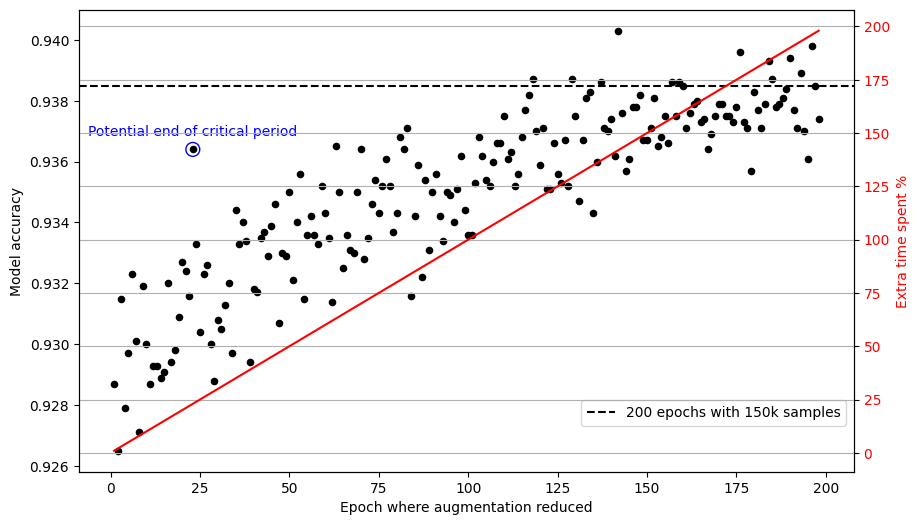

In [14]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(epochs[1:-1], accuracies[1:-1], color='black', s=20)
plt.axhline(y=accuracies[-1], color='black', linestyle='--', label=f'{n} epochs with {k_hi*original_train_size//1000}k samples')
# Create a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()

# Generate y values for the secondary y-axis
extra_time_spent = [i * 1 for i in range(len(epochs))]

# Plot the secondary y-axis data
ax2.plot(epochs[1:-1], extra_time_spent[1:-1], color='red')
ax2.set_ylabel('Extra time spent %')

# Combine legends from both y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower right', bbox_to_anchor=(0.99, 0.1), borderaxespad=0.)
# Highlight epoch 24 with a red circle
epoch_to_highlight = 23
accuracy_at_highlight = accuracies[epoch_to_highlight]
ax1.scatter(epoch_to_highlight, accuracy_at_highlight, edgecolor='blue', facecolor='none', zorder=5, s=100)
ax1.annotate(f'Potential end of critical period', (epoch_to_highlight, accuracy_at_highlight), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

# Title and labels
#plt.title(f'Models accuracies after {n} epochs with reduced augmentation from {k_hi*original_train_size//1000}k to {k_lo*original_train_size//1000}k samples per epoch')
ax1.set_ylabel('Model accuracy')
ax1.set_xlabel('Epoch where augmentation reduced')
ax2.set_ylabel('Extra time spent %', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Enable grid
plt.grid(True)

# Save the plot
plt.savefig(f'./figures/{model}_{dataset}_critical_oracle_scatter1.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


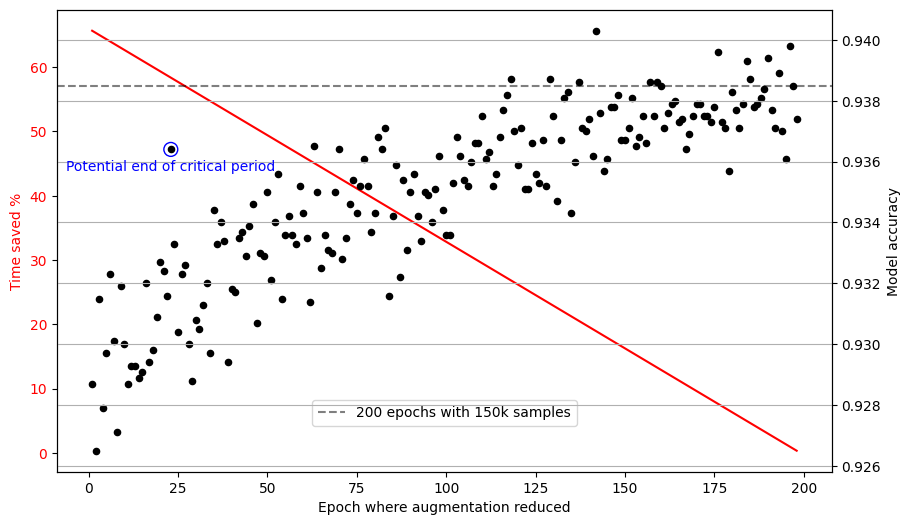

In [15]:
# Plot
plt.figure(figsize=(10, 6))

# Generate y values for the secondary y-axis
time_saved = np.linspace(66, 0, num=len(epochs))

# Swap left and right axes: Use the secondary axis (time saved) on the left and accuracy on the right
# Plot the secondary y-axis data on the primary axis
plt.plot(epochs[1:-1], time_saved[1:-1], color='red')

# Create the new secondary y-axis (accuracy)
ax1 = plt.gca()
ax2 = ax1.twinx()

# Scatter plot of accuracies on the secondary y-axis
ax2.scatter(epochs[1:-1], accuracies[1:-1], color='black', s=20)
ax2.axhline(y=accuracies[-1], color='black', linestyle='--', label=f'{n} epochs with {k_hi*original_train_size//1000}k samples', alpha=0.5)

# Highlight epoch 24 with a red circle
epoch_to_highlight = 23
accuracy_at_highlight = accuracies[epoch_to_highlight]
ax2.scatter(epoch_to_highlight, accuracy_at_highlight, edgecolor='blue', facecolor='none', zorder=5, s=100)
ax2.annotate(f'Potential end of critical period', (epoch_to_highlight, accuracy_at_highlight),
             textcoords="offset points", xytext=(0, -15), ha='center', color='blue')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='lower center', bbox_to_anchor=(0.5, 0.1), borderaxespad=0.)

# Title and labels
plt.xlabel('Epoch where augmentation reduced')
ax1.set_ylabel('Time saved %', color='red')
ax1.set_xlabel('Epoch where augmentation reduced')
ax2.set_ylabel('Model accuracy', color='black')
ax1.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='black')
plt.xlabel('epoch where augmentation reduced')

# Enable grid
plt.grid(True)

# Save the plot
plt.savefig(f'./figures/{model}_{dataset}_critical_oracle_scatter2.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()
